# Preparing Dataset

In [1]:
%config IPCompleter.greedy=True

import numpy as np
import cv2
import time
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
dataset ='Dataset/thresholdImages/'
os.listdir(dataset)

['0', '6', '4', '5', 'pa', '8', '7', '2', '9', 'BA', '3', '1']

In [2]:
labels = list(filter(lambda x : x!='Pradesh',os.listdir(dataset)))
labels = np.array(labels)
labels # our labels for training

array(['0', '6', '4', '5', 'pa', '8', '7', '2', '9', 'BA', '3', '1'],
      dtype='<U2')

In [22]:
64*64

4096

In [3]:
imageX_Axis = [] # creating X label 
imageY_Axis = [] # creating Y label
image_Path  = [] # All images Path
image_width= 32
image_height=32

dim = (image_width,image_height)
for label in labels:
    
    #path of the image folder
    labelPath = dataset + label
#     print(labelPath)
    #making a list of all images in the image folder
    image_Of_label = os.listdir(labelPath)
    
#     i=0
    for singleImage in image_Of_label:
        # single image path 
        imgPath = labelPath +'/'+singleImage
#         print(imgPath)
        image_ = cv2.imread(imgPath)  # reading a single Image
#         resizing image to 32*32 
        resize_image = cv2.resize(image_,dim,interpolation= cv2.INTER_CUBIC)  
#         print(resize_image.shape)
        imgArr = np.array(resize_image)       #converting it to numpyarray
        imgArr = imgArr[:,:,0] #changing to 2 dimension (32,32)
        
        imgArr = imgArr.ravel() # flatten the numpy array 32*32 = 1024 pixels
#         print(len(imgArr))
        # adding it to a numpy array withits Label
        imageX_Axis.append(imgArr)
        image_Path.append(imgPath)
        imageY_Axis.append(label)
        
#         if i==1:
#             break
#         i+=1
imageX_Axis= np.array(imageX_Axis)
imageY_Axis= np.array(imageY_Axis)
image_Path= np.array(image_Path)




In [4]:
print(f"X-axis Length : {len(imageX_Axis)}")
print(f"Y-axis Length : {len(imageY_Axis)}")
print(f"Total Images With Path Length : {len(image_Path)}")


X-axis Length : 17315
Y-axis Length : 17315
Total Images With Path Length : 17315


In [5]:
Pa = filter(lambda x:x == "Pa",imageY_Axis)
len(list(Pa))

0

In [6]:
pa = filter(lambda x:x == "pa",imageY_Axis)
len(list(pa))

1256

#### Fixing the Labels with same name but different case
- PA == Pa or pA or pa
- BA == ba or Ba or bA

In [7]:
imageY_Axis = list(map(lambda x:x.upper() ,imageY_Axis))
# imageY_Axis = list(map(lambda x: "PA" if x == "Pa" or x=="pA" or x=="pa" else x,imageY_Axis))

In [8]:
Pa = filter(lambda x:x == "PA",imageY_Axis)
len(list(Pa))

1256

In [9]:
imIndex=4
testImg = imageX_Axis[imIndex]
testImg_Label = imageY_Axis[imIndex]
testImg_Path = image_Path[imIndex]

testImg = testImg.reshape(32,32)

True Label : 0
True Path : Dataset/thresholdImages/0/0_98.png


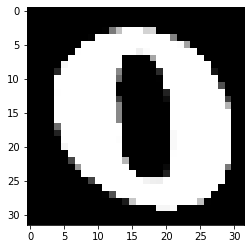

In [10]:
plt.imshow(testImg,cmap="gray")
print(f"True Label : {testImg_Label}")
print(f"True Path : {testImg_Path}")


In [11]:
# Using numpy's savez function to store our loaded data as NPZ files
np.savez('imageX_Axis.npz', imageX_Axis)
np.savez('imageY_Axis.npz', imageY_Axis)

np.savez('image_Path.npz', image_Path)


def load_dataset(): # Loads the saved numpy object and returns them as tuple
    
    npzfile = np.load("imageX_Axis.npz",allow_pickle=True)
    x_axis = npzfile['arr_0'] # x - axis
    
    npzfile = np.load("imageY_Axis.npz",allow_pickle=True)
    y_axis = npzfile['arr_0'] # y - axis

    npzfile = np.load("image_Path.npz",allow_pickle=True)

    paths = npzfile['arr_0'] # y - axis

    
    return (x_axis,y_axis,paths)

In [12]:
x_Axis,y_Axis,paths= load_dataset()
print(f"X-axis Length : {len(x_Axis)}")
print(f"Y-axis Length : {len(y_Axis)}")
print(f"Path Length : {len(paths)}")

X-axis Length : 17315
Y-axis Length : 17315
Path Length : 17315


True Label : 0
True Path : Dataset/thresholdImages/0/0_98.png


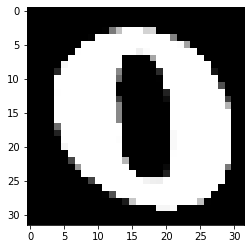

In [13]:
imIndex=4
testImg = x_Axis[imIndex]
testImg_Label = y_Axis[imIndex]
testImg_Path = paths[imIndex]

testImg = testImg.reshape(32,32)
plt.imshow(testImg,cmap="gray")
print(f"True Label : {testImg_Label}")
print(f"True Path : {testImg_Path}")


(121, 90, 3)

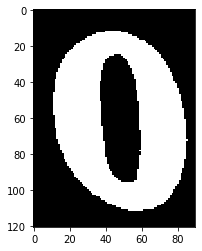

In [16]:
pathImgis = cv2.imread(testImg_Path)

plt.imshow(pathImgis)
pathImgis.shape

In [17]:
imageX_Axis,imageY_Axis,image_Path= load_dataset()
print(f"X-axis Length : {len(imageX_Axis)}")
print(f"Y-axis Length : {len(imageY_Axis)}")
print(f"Total Images  Path Length : {len(image_Path)}")


X-axis Length : 17315
Y-axis Length : 17315
Total Images  Path Length : 17315


In [18]:
datasetDf = pd.DataFrame(imageX_Axis,imageY_Axis)
datasetDf.head(3)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
datasetDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17315 entries, 0 to 1
Columns: 1024 entries, 0 to 1023
dtypes: uint8(1024)
memory usage: 17.0+ MB


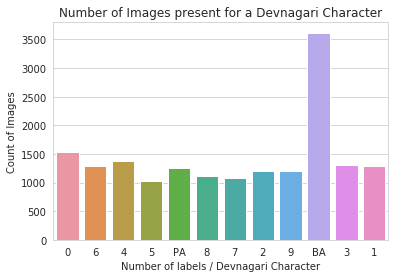

In [20]:
sns.set_style("whitegrid")
sns.countplot(x=datasetDf.index,linewidth=1,)
plt.title('Number of Images present for a Devnagari Character')
plt.xlabel('Number of labels / Devnagari Character')
plt.ylabel('Count of Images')
plt.show()

In [21]:
datasetDf['label'] = datasetDf.index
datasetDf['Imagepath'] = image_Path

In [22]:
datasetDf.head(3)

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,label,Imagepath
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dataset/thresholdImages/0/0_502.png
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dataset/thresholdImages/0/0_86.png
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dataset/thresholdImages/0/0_255.png


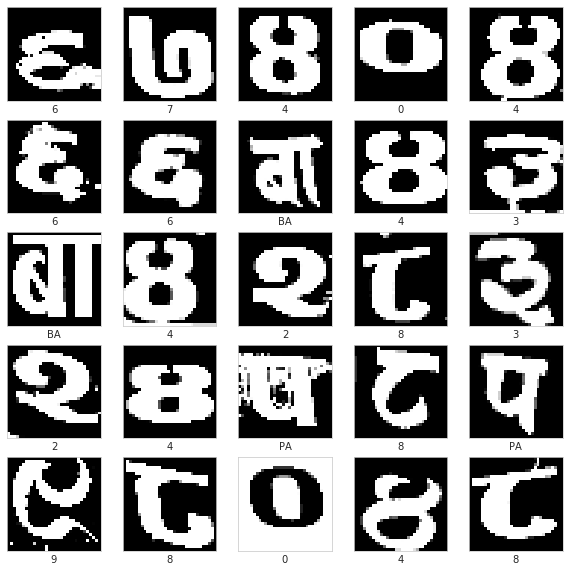

In [23]:
"""let's plot 25 random train set images """
plt.figure(figsize=(10,10))
rand = np.random.randint(1,len(datasetDf),25) #returns a array of random no. from 1 to 1000
# print(rand)
for i in range(len(rand)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    imgToShow = np.array(datasetDf.iloc[rand[i]])
    plt.xlabel(imgToShow[-2])
    imgToShow = imgToShow[:-2].reshape(32,32)
    plt.imshow(np.int16(imgToShow),cmap=plt.cm.gray)
#     plt.xlabel()


### Looking At images where black pixels are representing the character




In [24]:
#this dataframe may have such images 
# checking 1st pixel of image ...if has white background it has value 255
corner1_blackLetter = datasetDf.loc[datasetDf[0]==255]
corner2_blackLetter = datasetDf.loc[datasetDf[31]==255]
corner3_blackLetter = datasetDf.loc[datasetDf[992]==255]
corner4_blackLetter = datasetDf.loc[datasetDf[1023]==255]
corner_white_pixel1 = pd.merge(corner1_blackLetter,corner2_blackLetter,how="inner")
corner_white_pixel2 = pd.merge(corner3_blackLetter,corner4_blackLetter,how="inner")
corner_white_pixel = pd.merge(corner_white_pixel1,corner_white_pixel2,how="inner")
corner_white_pixel.head()

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,label,Imagepath
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,0,Dataset/thresholdImages/0/0_1411.png
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,0,Dataset/thresholdImages/0/0_875.png
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,0,Dataset/thresholdImages/0/0_166.png
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,0,Dataset/thresholdImages/0/0_15.png
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,0,Dataset/thresholdImages/0/0_1372.png


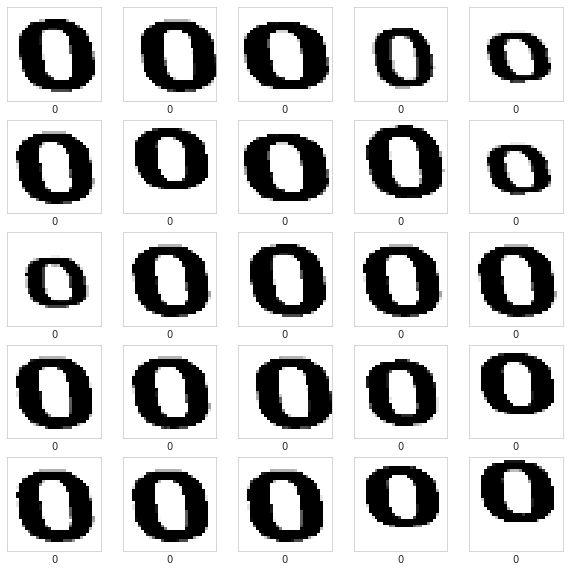

In [25]:
"""let's plot 25 random train set images """
plt.figure(figsize=(10,10))
rand = np.random.randint(1,37,25) #returns a array of random no. from 1 to 1000
# print(rand)
for i in range(len(rand)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    imgToShow = np.array(corner_white_pixel.iloc[rand[i]]) # a row from the 
    plt.xlabel(imgToShow[-2])

    imgToShow = imgToShow[:-2].reshape(32,32)
    plt.imshow(np.int16(imgToShow),cmap='gray')
#     plt.xlabel()


In [26]:
print(len(corner_white_pixel))
corner_white_pixel = corner_white_pixel.set_index("Imagepath")
corner_white_pixel.head()

335


,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
Imagepath,,,,,,,,,,,,,,,,,,,,,
Dataset/thresholdImages/0/0_1411.png,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
Dataset/thresholdImages/0/0_875.png,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
Dataset/thresholdImages/0/0_166.png,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
Dataset/thresholdImages/0/0_15.png,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
Dataset/thresholdImages/0/0_1372.png,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0


In [27]:
workingLabel = ["0","1","2","3","4","5","6","7","8","9","PA","BA"]

In [28]:
workingDataset = datasetDf.loc[datasetDf['label'].isin(workingLabel)]

In [29]:
workingDataset = workingDataset.set_index("Imagepath")
workingDataset.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
Imagepath,,,,,,,,,,,,,,,,,,,,,
Dataset/thresholdImages/0/0_502.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dataset/thresholdImages/0/0_86.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dataset/thresholdImages/0/0_255.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dataset/thresholdImages/0/0_337.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dataset/thresholdImages/0/0_98.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
print(len(workingDataset))


17315


In [31]:
workingDataset = workingDataset.loc[~workingDataset.index.isin(corner_white_pixel.index)]

In [32]:
len(workingDataset)

16980

In [33]:
workingDataset['label'].value_counts()

BA    3559
0     1448
4     1382
6     1272
1     1267
PA    1256
3     1256
9     1188
2     1166
8     1084
7     1074
5     1028
Name: label, dtype: int64

In [39]:
#this dataframe may have such images 
# checking 1st pixel of image ...if has white background it has value 255
corner1_blackLetter = workingDataset.loc[workingDataset[0]==255]
corner2_blackLetter = workingDataset.loc[workingDataset[31]==255]
corner3_blackLetter = workingDataset.loc[workingDataset[992]==255]
corner4_blackLetter = workingDataset.loc[workingDataset[1023]==255]
corner_white_pixel1 = pd.merge(corner1_blackLetter,corner2_blackLetter,how="inner")
corner_white_pixel2 = pd.merge(corner3_blackLetter,corner4_blackLetter,how="inner")
corner_white_pixel = pd.merge(corner_white_pixel1,corner_white_pixel2,how="inner")
corner_white_pixel.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label


In [40]:
workingDataset.to_csv("finalPathAndImage.csv")